## 1.tf.cast를 너무 자주 쓰는거 같은데? - 자주 쓸 수 밖에 없다.
아래처럼 a와 b의 자료형이 다르면 tf.equal은 그걸 기어이 에러를 내준다, tf.cast를 써줘야한다.
그리고 tf.equal을 하면 boolean으로 반환이 되는데 그걸 다른 애랑 연산하려면 또 tf.cast를 써야한다.

In [1]:
import tensorflow as tf
a=tf.constant([0,1,2,3,4,5,6,7,8,9])
b=tf.constant([0.,1,2,3,4,5,6,7,7,8])
# accuracy=tf.equal(a,b)  #이렇게 하면 에러가 난다, a와 b의 자료형이 달라서, 상당히 융통성이 없는 녀석이다.
a=tf.constant([0,1,2,3,4,5,6,7,8,9.])
accuracy=tf.equal(a,b)
print(accuracy)

# c=accuracy+a  #에러
c=tf.cast(accuracy,dtype=tf.float32)+a
print(c)
a=5
b=5.
print(type(a),type(b),a+b)     #이처럼 파이썬 자체는 다른 형에 대한 연산에 유연하지만 텐서플로우는 좀 더 엄격한거 같다.

ModuleNotFoundError: No module named 'tensorflow'

## 2. axis/rank는 가장 바깥부터 센다.
order를 왜 알아야하는가? axis라고도 하는데 tf.argmax 같은 함수를 쓸 때  Describes which axis of the input Tensor to reduce across.

In [15]:
#shape=(a,b,c)면 a,b,c가 아래와 같은 텐서에서 바깥부터 rank0, rank1,rank2니, rank0은 a, rank1은 b..이런 식으로..
#tf.argmax에서 axis 지정해주면 그 axis 방향으로 각 elements의 최댓값을 구한다.
a=tf.constant([[[1,2,3,4],[3,4,5,5],[3,48,8,6]],[[1,2,6,3],[3,48,8,6],[3,48,8,6]]])
print(a)
print(tf.argmax(a,axis=-2))
print(tf.argmax(a,dimension=2))

Tensor("Const_31:0", shape=(2, 3, 4), dtype=int32)
Tensor("ArgMax_5:0", shape=(2, 4), dtype=int64)
Tensor("ArgMax_6:0", shape=(2, 3), dtype=int64)


## 3.도대체 함수인자에 별은 뭐니? - 가변인자란다

In [1]:
#1) *args, **kwargs였나..이렇게 두 종류 있다.
#2) *는 영어로 Asterisk라고 한다. http://www.edwith.org/aipython/lecture/22956/
#3) 별 한개와 두개의 차이는 depth의 차이(별두개는 한개를 두번 쓰는 효과라든지, 별세개는 한개를 세번쓰는 효과라든지..)가 아니다.
#   별 한개는 list/tuple에 쓰이고 별 두개는 keyword를 가지는 sequence 데이터, 즉 dictionary에 쓰인다.
#4) 정리:asterisk는 함수인자에 쓰여서 가변인자를 표현하고. 리스트나 tuple 같은 sequence data 앞에 쓰여서 unpacking을 해준다.

In [51]:
# *은 끄집어내주는 역할을 한다고 생각하자.
a=[1,2,3,4]
b=[5,6,7,8]
print([a,b])
print([*a,*b]) #별을 붙이면 아래 처럼 list안에 있는 elements가 나온다.

def my_print(*args):
    print(type(args))
    print(args)     
    print(*args)   
    #type(*args)는 에러가 난다, 왜냐면 args는 튜플이고, *args는 그 튜플에 있는걸 끄집어내주니까,
    #type()이라는 함수에 인풋을 여러개 넣은 셈이 되니까.
print("==========my_print")
my_print("Hi, I'm hoon",a,b)
print("Hi, I'm hoon",a,b)

def my_print2(**kwargs):
    print(type(kwargs))         #dict 자료형이라는걸 알 수 있다.
    print(kwargs)     
    print(*kwargs)
    #print(**kwargs)    #에러 발생, 함수의 인자정도로만 쓸 수 있는 듯 하다.
print("==========my_print2")
my_print2(a="Hi, I'm hoon",b=a,c=b)  #반드시 a=b형태로 써야한다, 앞쪽이 key가 되고 오른쪽이 value가 된다.

def my_print3(a,b,c):
    print(a,b,c)

print("==========my_print3")
my_print3(3,4,5)
d={'b':3,'a':4,'c':5}
#my_print3(d) #에러 발생
my_print3(*d) #key를 입력으로
my_print3(**d) #value를 입력으로
#많은 경우 *args,**kwargs를 같이 쓰는거 같다, 전자는 key를 명시안한 인자들을 받고, 후자는 key가 명시 된 인자들을 받는다.

[[1, 2, 3, 4], [5, 6, 7, 8]]
[1, 2, 3, 4, 5, 6, 7, 8]
==========my_print
<class 'tuple'>
("Hi, I'm hoon", [1, 2, 3, 4], [5, 6, 7, 8])
Hi, I'm hoon [1, 2, 3, 4] [5, 6, 7, 8]
Hi, I'm hoon [1, 2, 3, 4] [5, 6, 7, 8]
==========my_print2
<class 'dict'>
{'a': "Hi, I'm hoon", 'b': [1, 2, 3, 4], 'c': [5, 6, 7, 8]}
a b c
==========my_print3
3 4 5
b a c
4 3 5


## 4.엑셀 불러오기
일단 openpyxl이라는 패키지를 설치해야한다.

In [4]:
from openpyxl import load_workbook
wb = load_workbook(filename = 'level_info.xlsx')  #엑셀파일을 불러온다.
print(wb.sheetnames)    #엑셀파일에 있는 시트들을 보여준다
print(str(wb.sheetnames).find('5Levels'))
wb2 = wb['2Levels']     #시트를 읽는다.
print(wb2.title)        #시트의 이름을 확인 할 수 있다.
print(wb2['2'])    #특정셀을 읽는다. (==wb2['B1'])
print(wb2['A1'].value)  #특정셀의 값을 읽는다.1
print("   wb2['A']    :",wb2['A'])         #특정 열의 값들을 읽는다.
print("  wb2['A:B']   :",wb2['A:B'])       #특정 열들의 값들을 읽는다.
print("  wb2.rows     :",wb2.rows)        
#wb2.rows의 자료형은 상당히 특이한데, tuple이나 iterator로 쓸 때 잘 작동하는걸 보니 관련 매서드를 잘 작성해 놓은거 같ㄷ.
print("tuple(wb2.rows):",tuple(wb2.rows)[0])  #행별로 값들을 읽어서 tuple로 묶어준다.
for a in tuple(wb2.rows)[0]:
    print(a.value)
print([cell.value for cell in tuple(wb2.rows)[0]])
#     print([a.value,b.value])


['2Levels', '3Levels', '4Levels']
-1
2Levels
(<Cell '2Levels'.A2>, <Cell '2Levels'.B2>)
-1
   wb2['A']    : (<Cell '2Levels'.A1>, <Cell '2Levels'.A2>)
  wb2['A:B']   : ((<Cell '2Levels'.A1>, <Cell '2Levels'.A2>), (<Cell '2Levels'.B1>, <Cell '2Levels'.B2>))
  wb2.rows     : <generator object Worksheet._cells_by_row at 0x7fbe13341e60>
tuple(wb2.rows): (<Cell '2Levels'.A1>, <Cell '2Levels'.B1>)
-1
1
[-1, 1]


## 5.텐서가 무엇이야, tf.assign은 무엇을 반환하지?
일단은 텐서는 operation node가 그 operation의 아웃풋을 위해 미리 만들어놓은 node, output node라고 생각하자.
이 output node는 다른 노드의 input이 될테니까 input node라고도 볼 수 있지.

In [60]:
tf.reset_default_graph()
value = tf.constant(1)
print(tf.get_default_graph().as_graph_def())
print(value)

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
versions {
  producer: 24
}

Tensor("Const:0", shape=(), dtype=int32)


In [62]:
tf.reset_default_graph()
value = tf.Variable(tf.ones_initializer()(()))
value2 = value+3
print(tf.get_default_graph().as_graph_def())
print(value)
print(value2)

node {
  name: "ones"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "Variable"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "Variable/Assign"
  op: "Assign"
  input: "Variable"
  input: "ones"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@Variable"
      }
    }
  }
  attr {
    key: "use_locking"
    value {
      b: true
    }
  }
  attr {
    key: "validate_shape"
    value {
      b: true
    }
  }
}
node {
  name: "Variable/read"
  op: "I

In [68]:
a=tf.Variable([3.,3])
b=tf.assign(a,[3.,2])  #Returns:A Tensor that will hold the new value of 'ref' after the assignment has completed.
c=tf.assign(a,[6,4.])
print(a)
print(b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("%12s:"%'Original a',sess.run(a))
    print("%12s:"%'b-Update a',sess.run(b))
    print("%12s:"%'new a',sess.run(a))      
    #print 안에서 sess.run을 실행했지만 실제 a가 업데이트 된다. sess.run은 어디서 실행되든 유효하다라고 생각 할 수 있다.
    print("%12s:"%'c-Update a',sess.run(c))
    print("%12s:"%'new a',sess.run(a))
    print("%12s:"%'Check b',sess.run(b)) #new a 를 반영하지 못한다.
    #b가 가지고 있는건 a 자체의 정보가 아니라, a에 업데이트한 그 값일 뿐이다.

<tf.Variable 'Variable_6:0' shape=(2,) dtype=float32_ref>
Tensor("Assign_10:0", shape=(2,), dtype=float32_ref)
  Original a: [3. 3.]
  b-Update a: [3. 2.]
       new a: [3. 2.]
  c-Update a: [6. 4.]
       new a: [6. 4.]
     Check b: [3. 2.]


In [70]:
a=tf.add(b,c)
print(a)
#텐서는 특정 operation node가 만든 output node라고 생각할 수 있을거 같다.
#tf.Variable처럼 tensor라고 안나오고 tf.Variable~~~이런 식으로 생성되는게 또 뭐가 있을지 찾아보자.

Tensor("Add_1:0", shape=(2,), dtype=float32)


## 6.Summary를 제대로 사용해보자
### 기본
1)무엇을 쓸건지

2)쓴다고 한 것들 모아줄래

3)써야하니까 리더기 만들고

4)리더기로 쓰고

5)못쓴거 다 뱉고 끝내자
### merge_all에 들어가지 못한 녀석, 특히 test_accuracy를 텐서보드에 write하기
보통 accuracy는 chaser=tf.summary.scalar를 이용해서 추적을 하지만, 데이터셋을 무엇을 넣느냐에  따라서 train_accuracy가 되기도 하고

test_accuracy가 되기도 한다. 그렇다고 데이터셋은 다른거인데 계속 똑같은 추적자로 그걸 추적하면 정확도 그래프가 아주 엉망일 것이다.

그래서 보통 train_accuracy는 일반적인 chaser 녀석으로 write하고, test_accuracy는 따로 sess.run을 통해 scalar값을 구한 뒤

그걸 따로 써주는 방법을 쓴다.

다만 인터넷에 이러한 경우를 처리하는 방식과 내가 처리하는 방식에 약간의 차이가 있어서, write와 summary부분을 정리할겸 무슨 차이인지 공부해보았다.

### 선행지식: 파싱 
(https://www.quora.com/What-exactly-does-parsing-mean-in-programming)

Parsing in Java methods means that the method is taking input from a string and returning some other data type.

The actual definition of "parse" in Wiktionary is "To split a file or other input into pieces of data that can be easily stored or manipulated." So we are splitting a string into parts then recognizing the parts to convert it into something simpler than a string.

In [23]:
from datetime import datetime
import tensorflow as tf
tf.reset_default_graph()
a=tf.Variable(0)
a_update=tf.assign(a,(a+1)%2)   
global_step=tf.Variable(0)
global_step_update=tf.assign(global_step,global_step+1)
summ1=tf.summary.scalar('compare/a',a)
summary_op=tf.summary.merge_all()
print(list(datetime.now().timetuple()[:-2]))
print(summ1)
print(summary_op)   #dtype=string인 텐서
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer());
    summary_writer = tf.summary.FileWriter('./logs/'+str(list(datetime.now().timetuple()[:-2])), graph=sess.graph)
    for i in range(1000):
        sess.run([a_update,global_step_update]);
        #i가 짝수일 때 a=1, 홀수일 때 a=0
#         if i%400==0:
#             summary_writer.add_summary(sess.run(summary_op), global_step=sess.run(global_step))
        #원래 위처럼 a를 텐서보드에 쓰는 것이 일반적이지만 명확한 비교를 위해서 쓰지않는다.
        if i%101==0:
            test=sess.run(a)%2
            temp=tf.summary.Summary.Value(tag="compare/test",simple_value=test)
            test_summary_op=tf.Summary(value=[tf.summary.Summary.Value(tag="compare/test",simple_value=test)])
            summary_writer.add_summary(test_summary_op,sess.run(global_step));
        #200steps마다 test를 기록해준다, 이 경우는 대영이에게 소개시켜 준 방법인데, parsefromstring을 쓰지 않는다.
        if i%251==0:
            test2=sess.run(a)%2+1
            test2_summary_op=tf.Summary();
            test2_summary_op.ParseFromString(sess.run(summary_op));
            test2_summary_op.value.add(tag="compare/test2",simple_value=test2);
            summary_writer.add_summary(test2_summary_op,sess.run(global_step));
        #400steps마다 test를 기록해준다, 이 경우는 내가 원래 쓰던 방법으로,parsefromstring을 사용한다.
    print(test_summary_op)        
    summary_writer.flush();
    


[2018, 3, 26, 20, 21, 25, 0]
Tensor("compare/a:0", shape=(), dtype=string)
Tensor("Merge/MergeSummary:0", shape=(), dtype=string)
value {
  tag: "compare/test"
  simple_value: 0.0
}



![title](./20180325shot01.png)
위 코드를 돌리면 위와 같은 그림을 얻을 수 있다. 즉 parsefromstring을 하는 이유는 기존의 suumary_op에 새로 value를 조금 붙여서 쓰려고하는 것이고, parsefromstring안한느건 그냥 새로운 value만 write하려고 하는 것이다. 그래서 그림에서 첫번째 그림과 세번째 그림이 write되는 빈도가 같은 것이다.

## 주피터노트북 팁들
### interactive shell

In [145]:
a=5
b=3

In [146]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
a+b
pow(a,b)
a*b
#매번 주피터노트북을 사용 할 때마다 위의 코드를 실행하고싶지 않으면, 저 세팅을 주피터노트북의 기본값으로 설정해주면 된다.
# ~/.ipython/profile_default/ipython_config.py 를 아래처럼 바꿔주면 된다.
# c = get_config() 
# # Run all nodes interactively 
# c.InteractiveShell.ast_node_interactivity = "all"

8

125

15

### 이미지 넣기

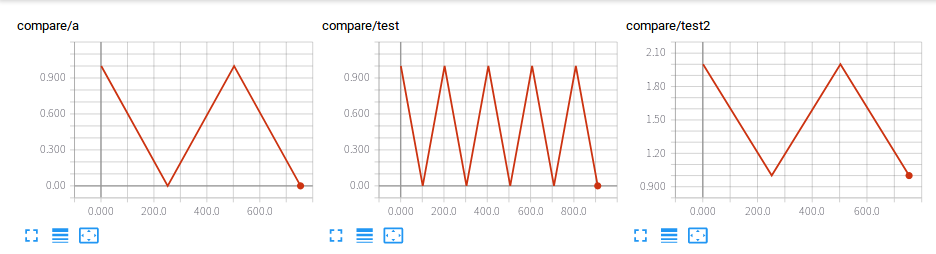

In [21]:
# ![title](./20180325shot01.png) 을 쓰면 markdown에 이미지삽입 가능 주의사항은 이미지 위치경로에 ""가 없다는 것임
#코드창을 통해서는 아래와 같은 방법으로 이미지를 불러올 수 있음
from IPython.display import Image
Image("./20180325shot01.png")